# VCT 2024 Seoul: Detailed Player Performance Analysis
This notebook performs a comprehensive analysis of player statistics from the **VALORANT Champions 2024 Seoul** event. 

### Objectives:
* Identify top-performing players across various metrics (Kills, Deaths, Assists, etc.).
* Compare player performance across different maps.
* Visualize the efficiency of different agents and team compositions.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.cm as cm

In [62]:
detailed_player_df = pd.read_csv("VCT_2024_seoul_dataset/detailed_matches_player_stats.csv")
performance_data = pd.read_csv("VCT_2024_seoul_dataset/performance_data.csv")

## 2. Data Exploration
Before diving into analysis, we examine the structure of our data to understand the available features (columns) and their types.

In [63]:
detailed_player_df

,match_id,event_name,event_stage,match_date,team1,team2,score_overall,player_name,player_id,player_team,...,a,kd_diff,kast,adr,hs_percent,fk,fd,fk_fd_diff,map_name,map_winner
0,378662,Valorant Champions 2024,Group Stage: \n\t\t\t\t\t\tOpening (B),2024-08-01 04:00:00,Gen.G,Sentinels,2 - 0,t3xture,9196,Gen.G,...,8,15,83%,160,30%,7,6,1,NaN,NaN
1,378662,Valorant Champions 2024,Group Stage: \n\t\t\t\t\t\tOpening (B),2024-08-01 04:00:00,Gen.G,Sentinels,2 - 0,Karon,34974,Gen.G,...,23,11,88%,138,33%,2,3,-1,NaN,NaN
2,378662,Valorant Champions 2024,Group Stage: \n\t\t\t\t\t\tOpening (B),2024-08-01 04:00:00,Gen.G,Sentinels,2 - 0,Meteor,13039,Gen.G,...,6,15,80%,156,30%,3,6,-3,NaN,NaN
3,378662,Valorant Champions 2024,Group Stage: \n\t\t\t\t\t\tOpening (B),2024-08-01 04:00:00,Gen.G,Sentinels,2 - 0,Munchkin,2489,Gen.G,...,21,-1,83%,132,23%,5,2,3,NaN,NaN
4,378662,Valorant Champions 2024,Group Stage: \n\t\t\t\t\t\tOpening (B),2024-08-01 04:00:00,Gen.G,Sentinels,2 - 0,Lakia,773,Gen.G,...,6,-4,73%,100,23%,4,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,378829,Valorant Champions 2024,Playoffs: \n\t\t\t\t\t\tGrand Final,2024-08-25 03:00:00,EDward Gaming,Team Heretics,3 - 2,benjyfishy,29873,Team Heretics,...,6,1,73%,148,60%,5,4,1,Abyss,EDward Gaming
1196,378829,Valorant Champions 2024,Playoffs: \n\t\t\t\t\t\tGrand Final,2024-08-25 03:00:00,EDward Gaming,Team Heretics,3 - 2,Wo0t,21328,Team Heretics,...,6,-3,73%,144,39%,1,3,-2,Abyss,EDward Gaming
1197,378829,Valorant Champions 2024,Playoffs: \n\t\t\t\t\t\tGrand Final,2024-08-25 03:00:00,EDward Gaming,Team Heretics,3 - 2,RieNs,10971,Team Heretics,...,5,-6,82%,116,37%,2,2,0,Abyss,EDward Gaming
1198,378829,Valorant Champions 2024,Playoffs: \n\t\t\t\t\t\tGrand Final,2024-08-25 03:00:00,EDward Gaming,Team Heretics,3 - 2,MiniBoo,18350,Team Heretics,...,3,-9,50%,93,21%,1,4,-3,Abyss,EDward Gaming


In [64]:
detailed_player_df = detailed_player_df[detailed_player_df['stat_type'] != 'overall'].copy()
detailed_player_df.drop(columns = ['event_name', 'match_date','stat_type'], inplace = True)
detailed_player_df

,match_id,event_stage,team1,team2,score_overall,player_name,player_id,player_team,agent,rating,...,a,kd_diff,kast,adr,hs_percent,fk,fd,fk_fd_diff,map_name,map_winner
10,378662,Group Stage: \n\t\t\t\t\t\tOpening (B),Gen.G,Sentinels,2 - 0,t3xture,9196,Gen.G,Jett,1.60,...,4,12,81%,188,31%,3,4,-1,Haven,Gen.G
11,378662,Group Stage: \n\t\t\t\t\t\tOpening (B),Gen.G,Sentinels,2 - 0,Meteor,13039,Gen.G,Killjoy,1.23,...,4,7,76%,140,26%,1,4,-3,Haven,Gen.G
12,378662,Group Stage: \n\t\t\t\t\t\tOpening (B),Gen.G,Sentinels,2 - 0,Lakia,773,Gen.G,Skye,1.06,...,4,3,86%,134,26%,2,1,1,Haven,Gen.G
13,378662,Group Stage: \n\t\t\t\t\t\tOpening (B),Gen.G,Sentinels,2 - 0,Karon,34974,Gen.G,Omen,1.02,...,12,2,86%,119,42%,1,1,0,Haven,Gen.G
14,378662,Group Stage: \n\t\t\t\t\t\tOpening (B),Gen.G,Sentinels,2 - 0,Munchkin,2489,Gen.G,Viper,0.70,...,7,-6,76%,96,24%,3,1,2,Haven,Gen.G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,378829,Playoffs: \n\t\t\t\t\t\tGrand Final,EDward Gaming,Team Heretics,3 - 2,benjyfishy,29873,Team Heretics,Cypher,1.11,...,6,1,73%,148,60%,5,4,1,Abyss,EDward Gaming
1196,378829,Playoffs: \n\t\t\t\t\t\tGrand Final,EDward Gaming,Team Heretics,3 - 2,Wo0t,21328,Team Heretics,Gekko,0.95,...,6,-3,73%,144,39%,1,3,-2,Abyss,EDward Gaming
1197,378829,Playoffs: \n\t\t\t\t\t\tGrand Final,EDward Gaming,Team Heretics,3 - 2,RieNs,10971,Team Heretics,Sova,0.79,...,5,-6,82%,116,37%,2,2,0,Abyss,EDward Gaming
1198,378829,Playoffs: \n\t\t\t\t\t\tGrand Final,EDward Gaming,Team Heretics,3 - 2,MiniBoo,18350,Team Heretics,Jett,0.55,...,3,-9,50%,93,21%,1,4,-3,Abyss,EDward Gaming


In [65]:
stage_values = detailed_player_df['event_stage'].unique()
stage_values

array(['Group Stage: \n\t\t\t\t\t\tOpening (B)',
       'Group Stage: \n\t\t\t\t\t\tOpening (A)',
       'Group Stage: \n\t\t\t\t\t\tOpening (C)',
       'Group Stage: \n\t\t\t\t\t\tOpening (D)',
       "Group Stage: \n\t\t\t\t\t\tWinner's (B)",
       "Group Stage: \n\t\t\t\t\t\tWinner's (A)",
       "Group Stage: \n\t\t\t\t\t\tWinner's (C)",
       "Group Stage: \n\t\t\t\t\t\tWinner's (D)",
       'Group Stage: \n\t\t\t\t\t\tElimination (B)',
       'Group Stage: \n\t\t\t\t\t\tElimination (A)',
       'Group Stage: \n\t\t\t\t\t\tElimination (C)',
       'Group Stage: \n\t\t\t\t\t\tElimination (D)',
       'Group Stage: \n\t\t\t\t\t\tDecider (B)',
       'Group Stage: \n\t\t\t\t\t\tDecider (A)',
       'Group Stage: \n\t\t\t\t\t\tDecider (C)',
       'Group Stage: \n\t\t\t\t\t\tDecider (D)',
       'Playoffs: \n\t\t\t\t\t\tUpper Quarterfinals',
       'Playoffs: \n\t\t\t\t\t\tLower Round 1',
       'Playoffs: \n\t\t\t\t\t\tUpper Semifinals',
       'Playoffs: \n\t\t\t\t\t\tLower Round

### Normalize Event Stage Labels
Define a mapping to group raw stage names into `Upper bracket` or `Lower bracket`,  
then replace values in `event_stage` for cleaner analysis.

In [66]:
# Define the mapping dictionary
mapping = {
    'Group Stage: \n\t\t\t\t\t\tOpening (B)': 'Upper bracket',
    'Group Stage: \n\t\t\t\t\t\tOpening (A)': 'Upper bracket',
    'Group Stage: \n\t\t\t\t\t\tOpening (C)': 'Upper bracket',
    'Group Stage: \n\t\t\t\t\t\tOpening (D)': 'Upper bracket',
    "Group Stage: \n\t\t\t\t\t\tWinner's (B)": 'Upper bracket',
    "Group Stage: \n\t\t\t\t\t\tWinner's (A)": 'Upper bracket',
    "Group Stage: \n\t\t\t\t\t\tWinner's (C)": 'Upper bracket',
    "Group Stage: \n\t\t\t\t\t\tWinner's (D)": 'Upper bracket',
    'Group Stage: \n\t\t\t\t\t\tElimination (B)': 'Lower bracket',
    'Group Stage: \n\t\t\t\t\t\tElimination (A)': 'Lower bracket',
    'Group Stage: \n\t\t\t\t\t\tElimination (C)': 'Lower bracket',
    'Group Stage: \n\t\t\t\t\t\tElimination (D)': 'Lower bracket',
    'Group Stage: \n\t\t\t\t\t\tDecider (B)': 'Lower bracket',
    'Group Stage: \n\t\t\t\t\t\tDecider (A)': 'Lower bracket',
    'Group Stage: \n\t\t\t\t\t\tDecider (C)': 'Lower bracket',
    'Group Stage: \n\t\t\t\t\t\tDecider (D)': 'Lower bracket',
    'Playoffs: \n\t\t\t\t\t\tUpper Quarterfinals': 'Upper bracket',
    'Playoffs: \n\t\t\t\t\t\tLower Round 1': 'Lower bracket',
    'Playoffs: \n\t\t\t\t\t\tUpper Semifinals': 'Upper bracket',
    'Playoffs: \n\t\t\t\t\t\tLower Round 2': 'Lower bracket',
    'Playoffs: \n\t\t\t\t\t\tUpper Final': 'Upper bracket',
    'Playoffs: \n\t\t\t\t\t\tLower Round 3': 'Lower bracket',
    'Playoffs: \n\t\t\t\t\t\tLower Final': 'Lower bracket',
    'Playoffs: \n\t\t\t\t\t\tGrand Final': 'Upper bracket'
}

# Update the column using the mapping
detailed_player_df['event_stage'] = detailed_player_df['event_stage'].replace(mapping)

In [67]:
detailed_player_df

,match_id,event_stage,team1,team2,score_overall,player_name,player_id,player_team,agent,rating,...,a,kd_diff,kast,adr,hs_percent,fk,fd,fk_fd_diff,map_name,map_winner
10,378662,Upper bracket,Gen.G,Sentinels,2 - 0,t3xture,9196,Gen.G,Jett,1.60,...,4,12,81%,188,31%,3,4,-1,Haven,Gen.G
11,378662,Upper bracket,Gen.G,Sentinels,2 - 0,Meteor,13039,Gen.G,Killjoy,1.23,...,4,7,76%,140,26%,1,4,-3,Haven,Gen.G
12,378662,Upper bracket,Gen.G,Sentinels,2 - 0,Lakia,773,Gen.G,Skye,1.06,...,4,3,86%,134,26%,2,1,1,Haven,Gen.G
13,378662,Upper bracket,Gen.G,Sentinels,2 - 0,Karon,34974,Gen.G,Omen,1.02,...,12,2,86%,119,42%,1,1,0,Haven,Gen.G
14,378662,Upper bracket,Gen.G,Sentinels,2 - 0,Munchkin,2489,Gen.G,Viper,0.70,...,7,-6,76%,96,24%,3,1,2,Haven,Gen.G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,378829,Upper bracket,EDward Gaming,Team Heretics,3 - 2,benjyfishy,29873,Team Heretics,Cypher,1.11,...,6,1,73%,148,60%,5,4,1,Abyss,EDward Gaming
1196,378829,Upper bracket,EDward Gaming,Team Heretics,3 - 2,Wo0t,21328,Team Heretics,Gekko,0.95,...,6,-3,73%,144,39%,1,3,-2,Abyss,EDward Gaming
1197,378829,Upper bracket,EDward Gaming,Team Heretics,3 - 2,RieNs,10971,Team Heretics,Sova,0.79,...,5,-6,82%,116,37%,2,2,0,Abyss,EDward Gaming
1198,378829,Upper bracket,EDward Gaming,Team Heretics,3 - 2,MiniBoo,18350,Team Heretics,Jett,0.55,...,3,-9,50%,93,21%,1,4,-3,Abyss,EDward Gaming


### Average Player Rating: Win vs Loss
- Add a column to mark map result (Win/Loss) for each player  
- Group by result to compute average rating  
- Sort results for consistent plotting  
- Build a bar chart (green = Win, red = Loss) with value labels on top

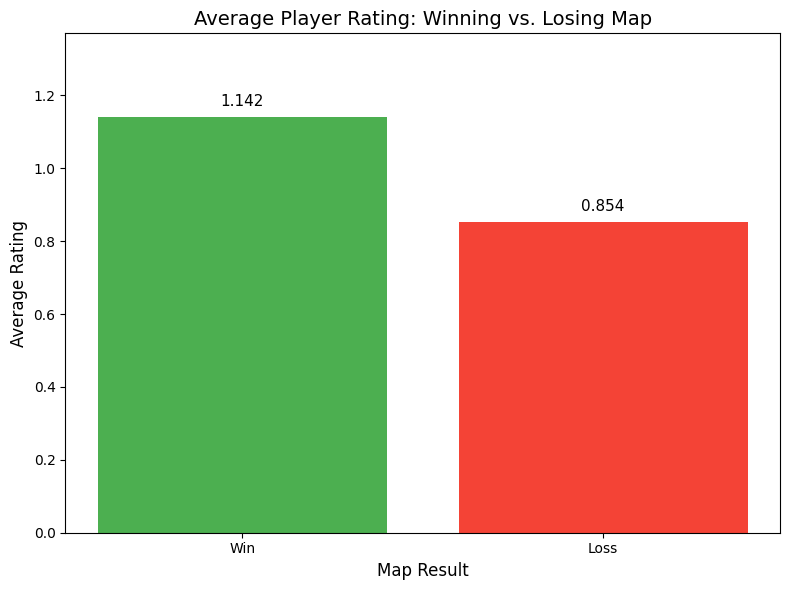

In [68]:
# Average Player rating : Winning vs Losing Map
# Create a column to distinguish between win and loss for the player in that map
detailed_player_df['map_result'] = detailed_player_df.apply(
    lambda x: 'Win' if x['player_team'] == x['map_winner'] else 'Loss', axis=1
)

# Calculate average rating per map result
avg_rating = detailed_player_df.groupby('map_result')['rating'].mean().reset_index()

# Sort for consistent visualization (Win then Loss)
avg_rating = avg_rating.sort_values(by='rating', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 6))
colors = ['#4CAF50', '#F44336'] # Green for Win, Red for Loss
bars = plt.bar(avg_rating['map_result'], avg_rating['rating'], color=colors)

# Add labels and title
plt.xlabel('Map Result', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Average Player Rating: Winning vs. Losing Map', fontsize=14, fontweight = 'normal')
plt.ylim(0, avg_rating['rating'].max() * 1.2) 

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), 
             ha='center', va='bottom', fontsize=11,fontweight='normal')

plt.tight_layout()
plt.show()

### Average ADR per Map
Group by map to calculate mean ADR, sort results, then plot a bar chart with value labels.

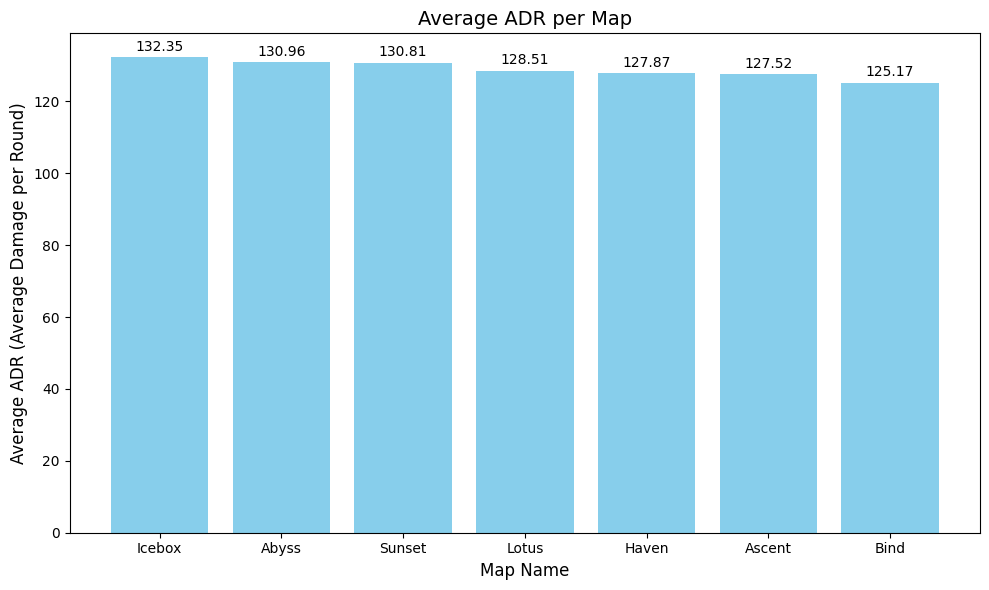

In [69]:
# Average ADR per map
# Grouping by map_name and calculating the average ADR
avg_adr_map = detailed_player_df.groupby('map_name')['adr'].mean().reset_index()

# Sorting the data by ADR in descending order for better visualization
avg_adr_map = avg_adr_map.sort_values(by='adr', ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_adr_map['map_name'], avg_adr_map['adr'], color='skyblue')

# Add labels and title
plt.xlabel('Map Name', fontsize=12)
plt.ylabel('Average ADR (Average Damage per Round)', fontsize=12)
plt.title('Average ADR per Map', fontsize=14,fontweight='normal')

# Adding value labels on top of the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, round(yval, 2), 
             ha='center', va='bottom', fontweight='normal')

plt.tight_layout()
plt.show()

### Average Kill Contribution by Agent
Group by agent to compute mean kills, sort results, then plot a bar chart with value labels.

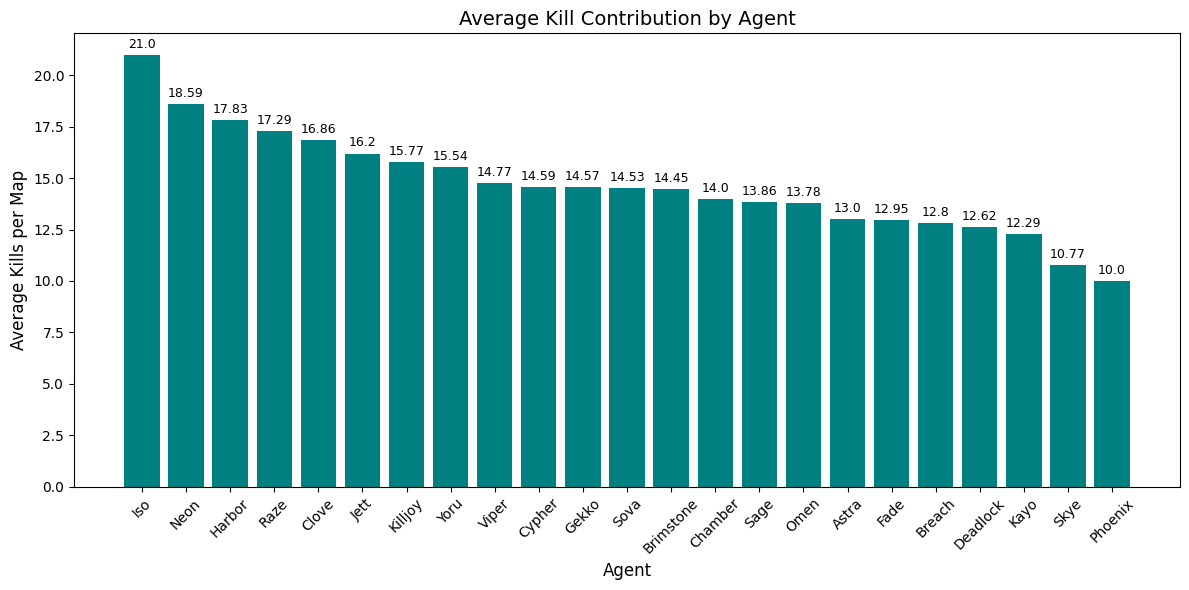

In [70]:
# Average Kill contraibution by Agent 
# Grouping by agent and calculating average kills (column 'k')
avg_kills_agent = detailed_player_df.groupby('agent')['k'].mean().reset_index()

# Sorting the data by average kills in descending order
avg_kills_agent = avg_kills_agent.sort_values(by='k', ascending=False)

# Creating the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_kills_agent['agent'], avg_kills_agent['k'], color='teal')

# Add labels and title
plt.xlabel('Agent', fontsize=12)
plt.ylabel('Average Kills per Map', fontsize=12)
plt.title('Average Kill Contribution by Agent', fontsize=14,fontweight='normal')
plt.xticks(rotation=45)

# Adding value labels on top of the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), 
             ha='center', va='bottom', fontsize=9, fontweight='normal')

plt.tight_layout()
plt.show()

### Average Headshot % by Agent
- Clean `hs_percent` column (remove `%`, convert to float)  
- Group by agent to compute mean headshot %  
- Sort results in descending order  
- Plot a bar chart with value labels for clarity

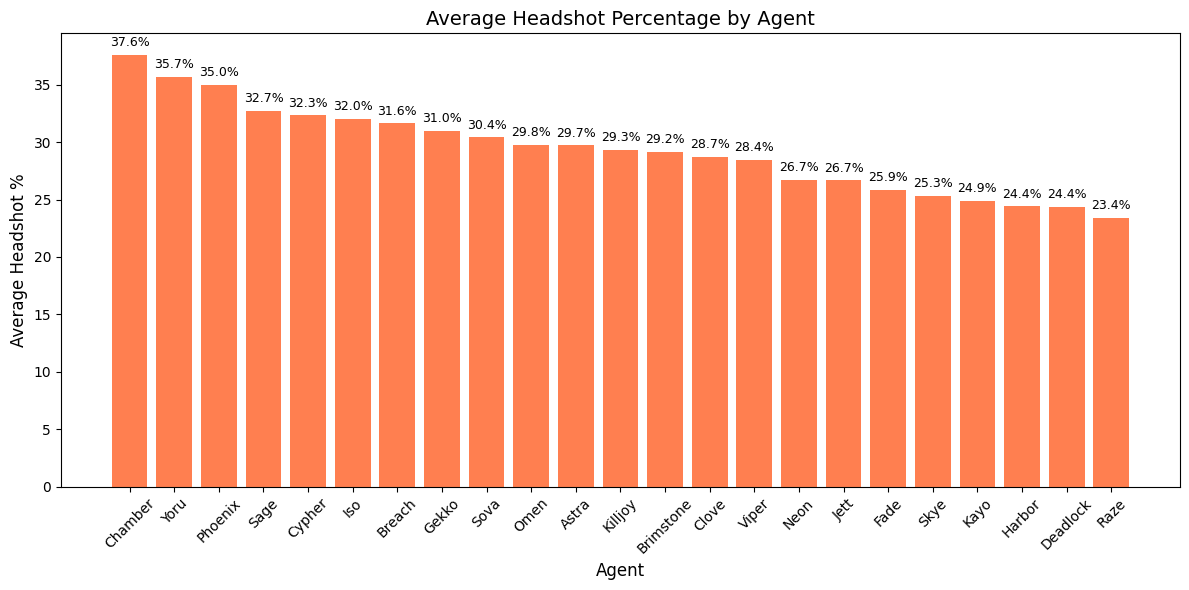

In [71]:
# Average Headshot by Agent 
# Clean 'hs_percent' column by removing '%' and converting to numeric if necessary
if detailed_player_df['hs_percent'].dtype == object:
    detailed_player_df['hs_percent_numeric'] = detailed_player_df['hs_percent'].str.rstrip('%').astype('float')
else:
    detailed_player_df['hs_percent_numeric'] = detailed_player_df['hs_percent']

# Grouping by agent and calculating average headshot percentage
avg_hs_agent = detailed_player_df.groupby('agent')['hs_percent_numeric'].mean().reset_index()

# Sorting the data by headshot percentage in descending order
avg_hs_agent = avg_hs_agent.sort_values(by='hs_percent_numeric', ascending=False)

# Creating the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_hs_agent['agent'], avg_hs_agent['hs_percent_numeric'], color='coral')

# Add labels and title
plt.xlabel('Agent', fontsize=12)
plt.ylabel('Average Headshot %', fontsize=12)
plt.title('Average Headshot Percentage by Agent', fontsize=14, fontweight = 'normal')
plt.xticks(rotation=45)

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{round(yval, 1)}%', 
             ha='center', va='bottom', fontsize=9, fontweight='normal')

plt.tight_layout()
plt.show()

### Agent → Role Mapping
Define a dictionary to map each agent to their role (Duelist, Initiator, Controller, Sentinel),  
then apply it to create a new `agent_role` column in the dataset.


In [72]:
# Define the agent to role mapping
agent_roles = {
    # Duelists: Entry-fragging and space-making
    'Jett': 'Duelist', 'Phoenix': 'Duelist', 'Raze': 'Duelist', 
    'Yoru': 'Duelist', 'Neon': 'Duelist', 'Iso': 'Duelist', 'Reyna': 'Duelist',
    
    # Initiators: Scouting and setting up engagements
    'Sova': 'Initiator', 'Breach': 'Initiator', 'Skye': 'Initiator', 
    'Kayo': 'Initiator', 'Fade': 'Initiator', 'Gekko': 'Initiator',
    
    # Controllers: Vision blocking and site control
    'Brimstone': 'Controller', 'Viper': 'Controller', 'Omen': 'Controller', 
    'Astra': 'Controller', 'Harbor': 'Controller', 'Clove': 'Controller',
    
    # Sentinels: Defensive lockdown and flank watching
    'Sage': 'Sentinel', 'Cypher': 'Sentinel', 'Killjoy': 'Sentinel', 
    'Chamber': 'Sentinel', 'Deadlock': 'Sentinel', 'Vyse': 'Sentinel'
}
# Apply mapping
detailed_player_df['agent_role'] = detailed_player_df['agent'].map(agent_roles)

### Top 5 Agents by Average Assists (per Role)
- Group by agent + role to compute mean assists  
- Sort and filter top 5 agents within each role  
- Plot results in a 2×2 grid of horizontal bar charts (one per role)  
- Add value labels for clarity

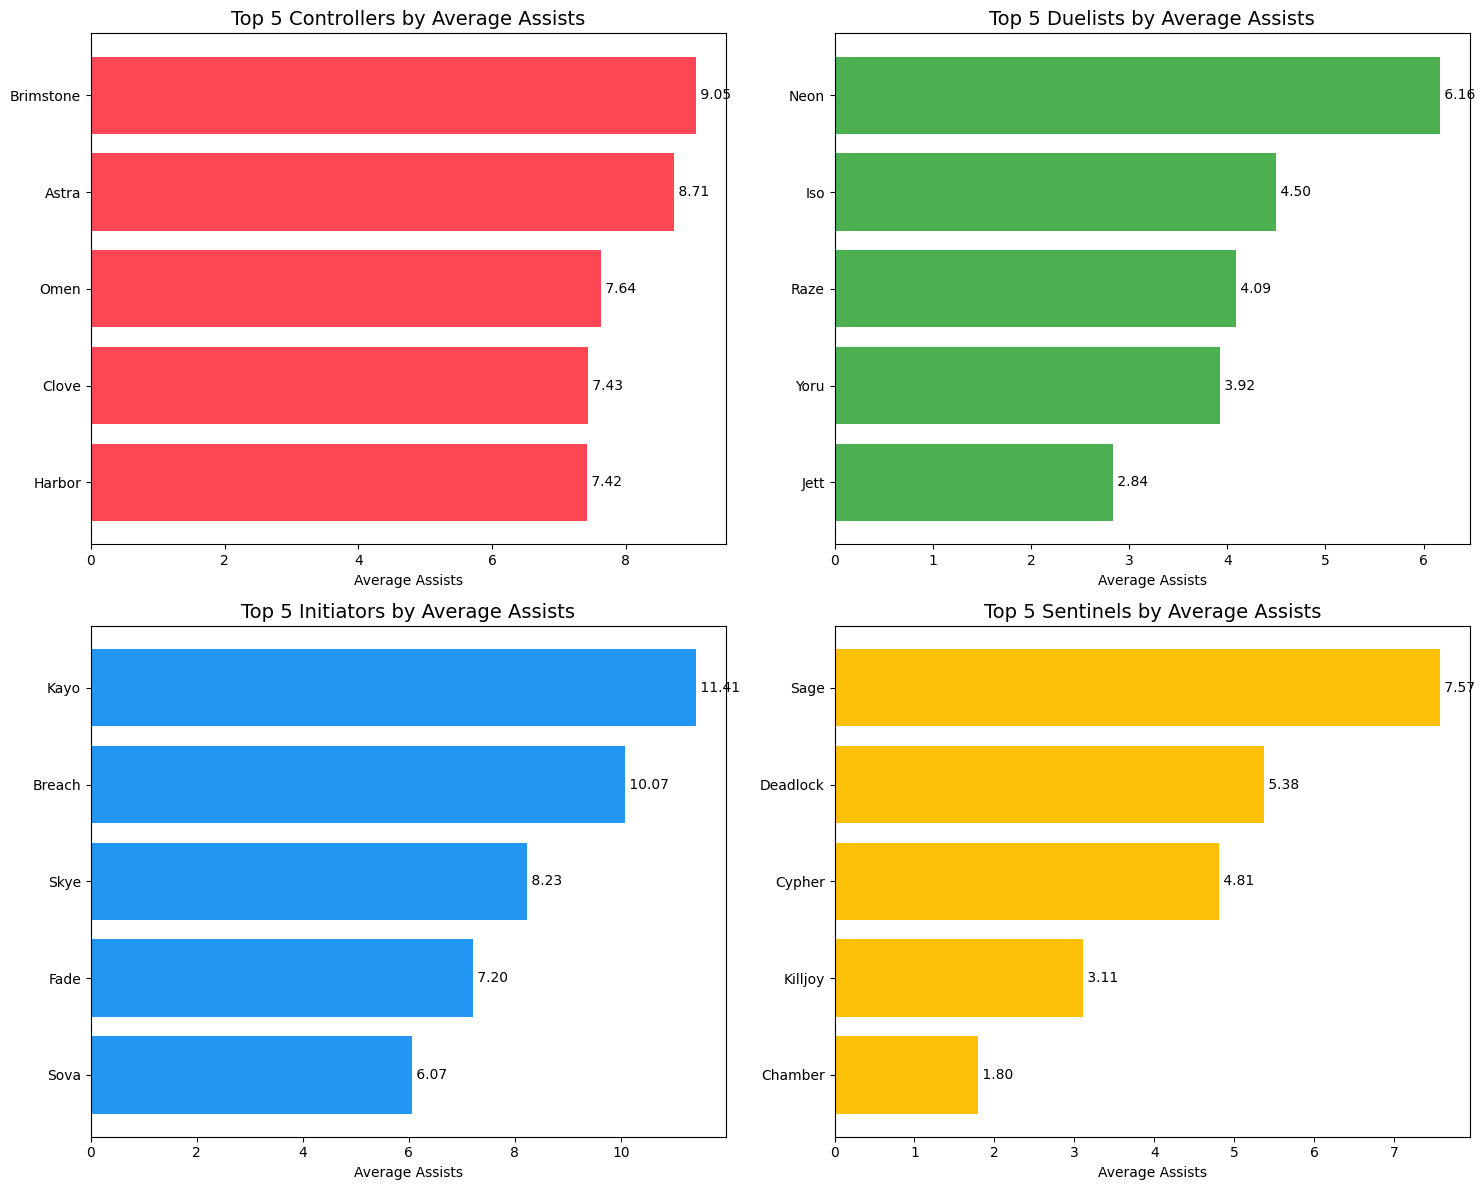

In [73]:
# Average Assist by Agent Type ( top 5 agents for each category)

# Calculate average assists per agent and role
avg_assists = detailed_player_df.groupby(['agent_role', 'agent'])['a'].mean().reset_index()

# Filter top 5 agents for each category
top_5_per_role = avg_assists.sort_values(['agent_role', 'a'], ascending=[True, False]).groupby('agent_role').head(5)

# Create visualization (2x2 Subplots)
roles = top_5_per_role['agent_role'].unique()
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()
colors = ['#FF4655', '#4CAF50', '#2196F3', '#FFC107']

for i, role in enumerate(roles):
    role_data = top_5_per_role[top_5_per_role['agent_role'] == role].sort_values('a', ascending=True)
    axes[i].barh(role_data['agent'], role_data['a'], color=colors[i])
    axes[i].set_title(f'Top 5 {role}s by Average Assists', fontsize=14, fontweight='normal')
    axes[i].set_xlabel('Average Assists')
    
    # Add value labels
    for index, value in enumerate(role_data['a']):
        axes[i].text(value, index, f' {value:.2f}', va='center')

plt.tight_layout()
plt.show()

### KAST Distribution by Agent Role
- Clean `kast` column (remove `%`, convert to float)  
- Plot violin chart of KAST % grouped by agent role  
- Show quartiles inside each distribution for better comparison

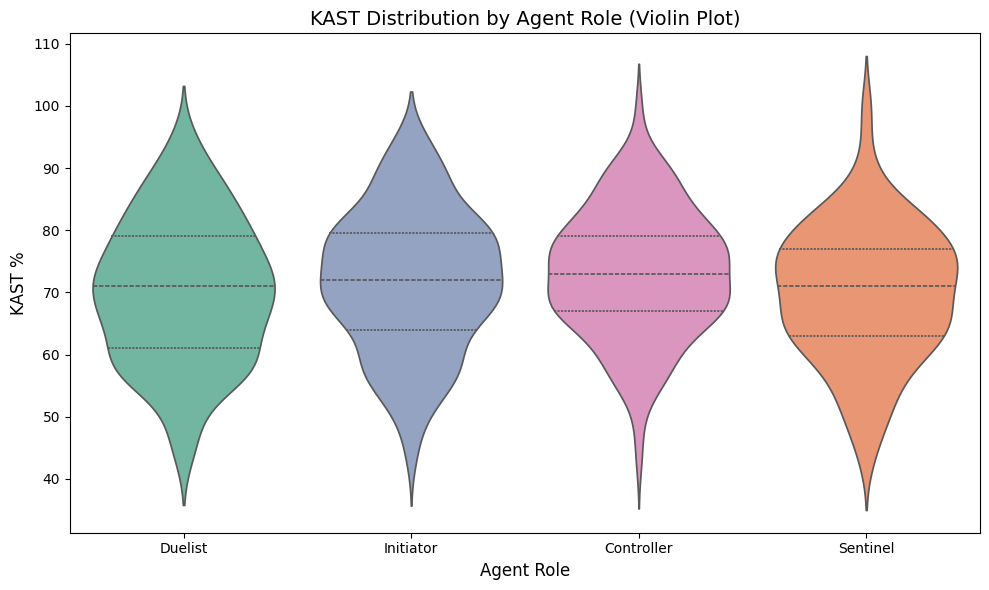

In [74]:
# KAST distribution by role
# Clean the KAST column: remove '%' and convert to numeric
if detailed_player_df['kast'].dtype == object:
    detailed_player_df['kast_numeric'] = detailed_player_df['kast'].str.rstrip('%').astype('float')
else:
    detailed_player_df['kast_numeric'] = detailed_player_df['kast']

# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='agent_role', y='kast_numeric', data=detailed_player_df, 
               palette='Set2', inner='quartile', hue = 'agent_role',
               order=['Duelist', 'Initiator', 'Controller', 'Sentinel'])

# Add labels and title
plt.xlabel('Agent Role', fontsize=12)
plt.ylabel('KAST %', fontsize=12)
plt.title('KAST Distribution by Agent Role (Violin Plot)', fontsize=14)

plt.tight_layout()

### Relationship between ADR and ACS
- Plot scatter of ADR vs ACS with regression line  
- Add axis labels + title for clarity  
- Compute correlation coefficient and display it on the chart

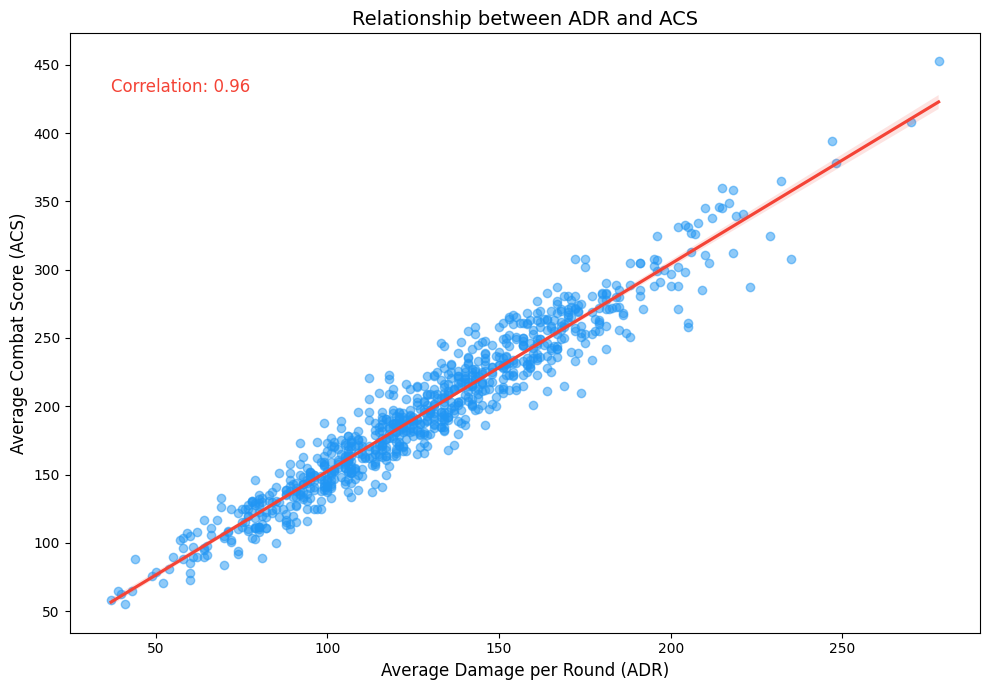

In [75]:
# Relation between ACS and ADR

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 7))
sns.regplot(x='adr', y='acs', data=detailed_player_df, 
            scatter_kws={'alpha':0.5, 'color':'#2196F3'}, 
            line_kws={'color':'#F44336'})

# Add labels and title
plt.xlabel('Average Damage per Round (ADR)', fontsize=12)
plt.ylabel('Average Combat Score (ACS)', fontsize=12)
plt.title('Relationship between ADR and ACS', fontsize=14)

# Calculate and display the correlation coefficient on the plot
correlation = detailed_player_df['adr'].corr(detailed_player_df['acs'])
plt.text(detailed_player_df['adr'].min(), detailed_player_df['acs'].max() * 0.95, 
         f'Correlation: {correlation:.2f}', fontsize=12, fontweight='normal', color='#F44336')

plt.tight_layout()
plt.show()

### Rating Distribution by Agent Role
- Map agents to their roles (Duelist, Initiator, Controller, Sentinel)  
- Plot a boxplot of player ratings grouped by role  
- Use consistent ordering and color palette for clarity

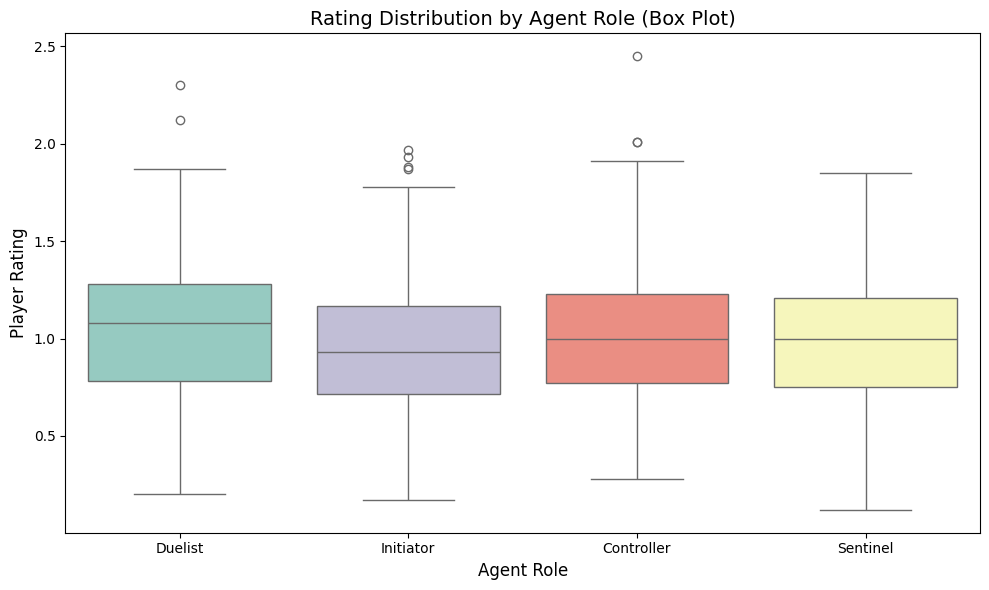

In [76]:
# Rating distribution by Agent role

# Apply the role mapping
detailed_player_df['agent_role'] = detailed_player_df['agent'].map(agent_roles)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='agent_role', y='rating', data=detailed_player_df, 
            palette='Set3', hue = detailed_player_df['agent_role'] ,order=['Duelist', 'Initiator', 'Controller', 'Sentinel'])

# Add labels and title
plt.xlabel('Agent Role', fontsize=12)
plt.ylabel('Player Rating', fontsize=12)
plt.title('Rating Distribution by Agent Role (Box Plot)', fontsize=14)

plt.tight_layout()
plt.show()

### Mirror Matchup Analysis
- Group matches by `match_id` + `map_name` to isolate sessions  
- Compare agent compositions between the two teams → label as **Mirror** or **Non‑Mirror**  
- Compute rating gap (avg rating difference between teams)  
- Build a summary DataFrame with matchup metadata  
- Count frequency of mirror vs non‑mirror compositions and visualize with a bar chart

In [77]:
# --- Mirror Matchup DATA PROCESSING ---
map_analysis_data = []

# Grouping by match and map to isolate each game session
map_groups = detailed_player_df.groupby(['match_id', 'map_name'])

for (match_id, map_name), group in map_groups:
    teams = group['player_team'].unique()
    
    if len(teams) == 2:
        # 1. Determine Mirror Status
        team1_agents = sorted(group[group['player_team'] == teams[0]]['agent'].tolist())
        team2_agents = sorted(group[group['player_team'] == teams[1]]['agent'].tolist())
        is_mirror = 'Mirror' if team1_agents == team2_agents else 'Non-Mirror'
        
        # 2. Calculate Team Performance Gap (Average Rating Difference)
        team1_rating = group[group['player_team'] == teams[0]]['rating'].mean()
        team2_rating = group[group['player_team'] == teams[1]]['rating'].mean()
        rating_gap = abs(team1_rating - team2_rating)
        
        # 3. Store results including metadata for other plots
        map_analysis_data.append({
            'match_id': match_id,
            'map_name': map_name,
            'composition_type': is_mirror,
            'rating_gap': rating_gap,
            'event_stage': group['event_stage'].iloc[0]
        })

# Create a clean summary DataFrame
map_summary_df = pd.DataFrame(map_analysis_data)

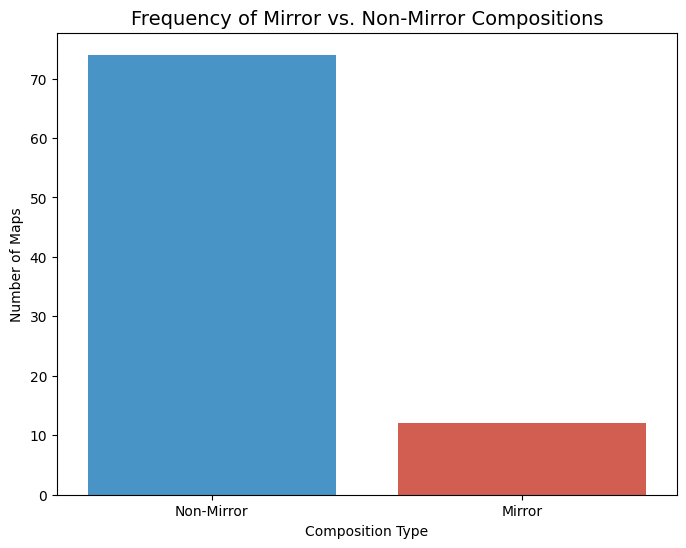

In [78]:
# how common are mirror compositions
# frequency of compositions
comp_counts = map_summary_df['composition_type'].value_counts().reset_index()
comp_counts.columns = ['Composition Type', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Composition Type', y='Count', data=comp_counts, 
            hue='Composition Type', palette=['#3498db', '#e74c3c'], legend=False)

plt.title('Frequency of Mirror vs. Non-Mirror Compositions', fontsize=14)
plt.ylabel('Number of Maps')
plt.show()

### Team Performance Gap: Mirror vs Non‑Mirror
- Use pre‑calculated `rating_gap` values  
- Plot boxplots comparing mirror vs non‑mirror compositions

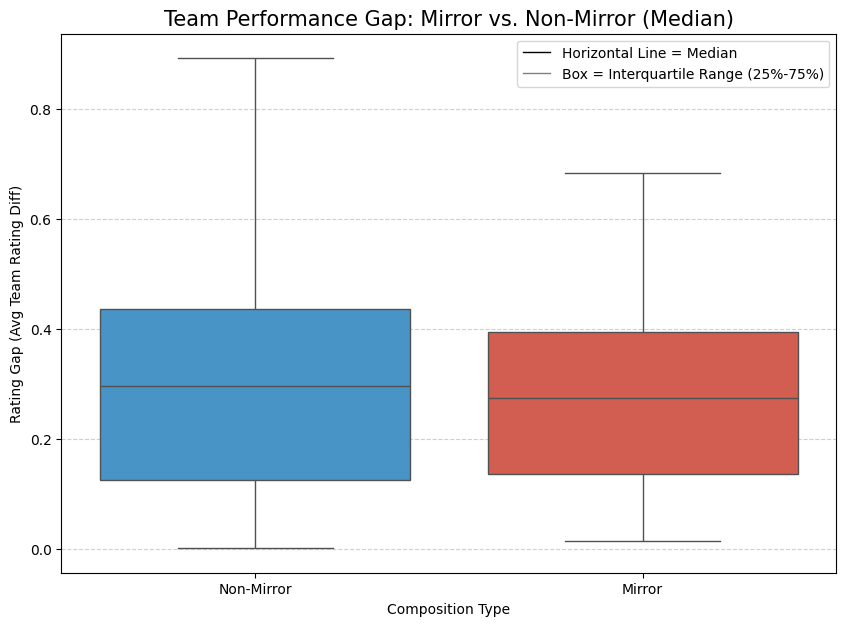

In [79]:
# Team performance gap - mirror vs non mirror 
plt.figure(figsize=(10, 7))

# Plotting using the pre-calculated rating_gap
sns.boxplot(x='composition_type', y='rating_gap', data=map_summary_df, 
            hue='composition_type', palette=['#3498db', '#e74c3c'], legend=False)

# Custom legend using Line2D (import is at the top of the processing block)
legend_elements = [
    Line2D([0], [0], color='black', lw=1, label='Horizontal Line = Median'),
    Line2D([0], [0], color='grey', lw=1, label='Box = Interquartile Range (25%-75%)')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.title('Team Performance Gap: Mirror vs. Non-Mirror (Median)', fontsize=15, fontweight='normal')
plt.ylabel('Rating Gap (Avg Team Rating Diff)')
plt.xlabel('Composition Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Mirror vs Non‑Mirror Composition Distribution per Map
- Build a crosstab of map vs composition type, normalize to percentages  
- Sort maps by Mirror % for cleaner ordering  
- Plot stacked bar chart showing share of Mirror vs Non‑Mirror comps per map

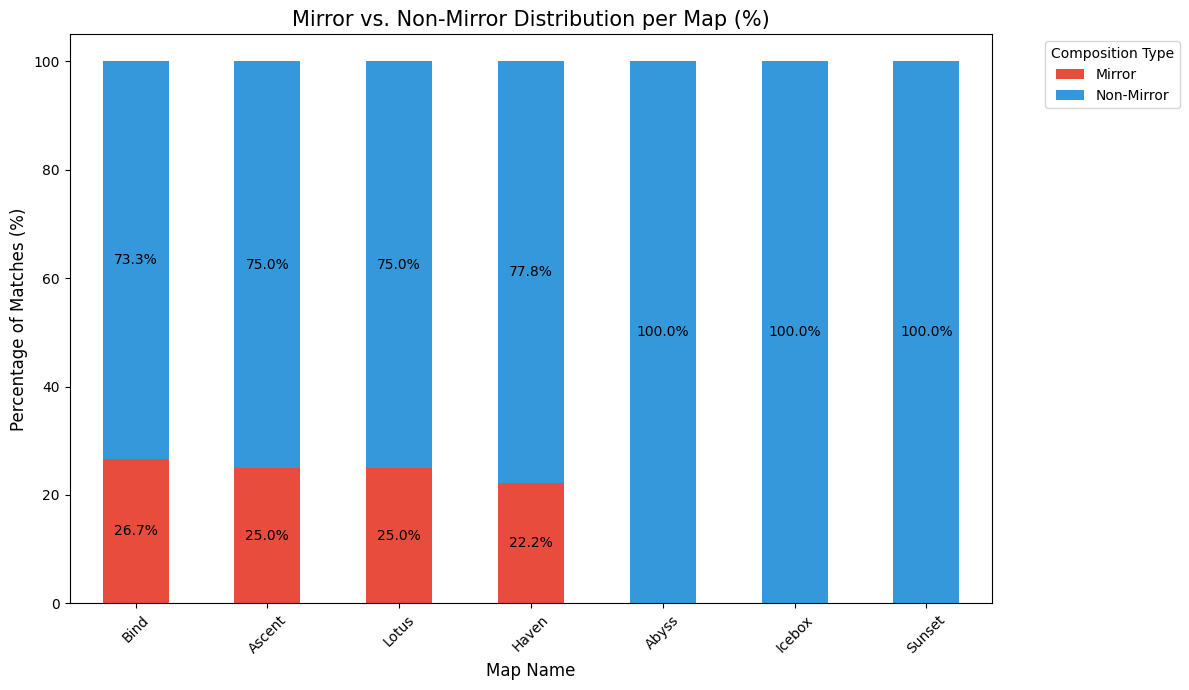

In [80]:
# Percentage Distribution of Mirror vs Non- mirror Comps per Map

# --- 1. Create a Crosstab of Map vs Composition Type ---
# Use pd.crosstab to compute a frequency table and count how many times combinations of same agent pool values occur
# We use normalize='index' to get percentages (0.0 to 1.0) and multiply by 100
pivot_df = pd.crosstab(map_summary_df['map_name'], map_summary_df['composition_type'], normalize='index') * 100

# Sort by 'Mirror' percentage so the chart looks organized
pivot_df = pivot_df.sort_values(by='Mirror', ascending=False)

# --- 2. Create the Stacked Bar Chart ---
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#e74c3c', '#3498db'])

# --- 3. Add Percentage Annotations inside the bars ---
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 5:  # Only show text if the bar segment is large enough
        ax.text(x + width/2, 
                y + height/2, 
                f'{height:.1f}%', 
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
                fontweight='normal',
                fontsize=10)

# --- 4. Formatting ---
plt.title('Mirror vs. Non-Mirror Distribution per Map (%)', fontsize=15, fontweight='normal')
plt.ylabel('Percentage of Matches (%)', fontsize=12)
plt.xlabel('Map Name', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Composition Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Map Distribution by Bracket Type
- Build a crosstab of bracket type vs map, normalize to percentages  
- Plot stacked bar chart with distinct color palette for multiple maps

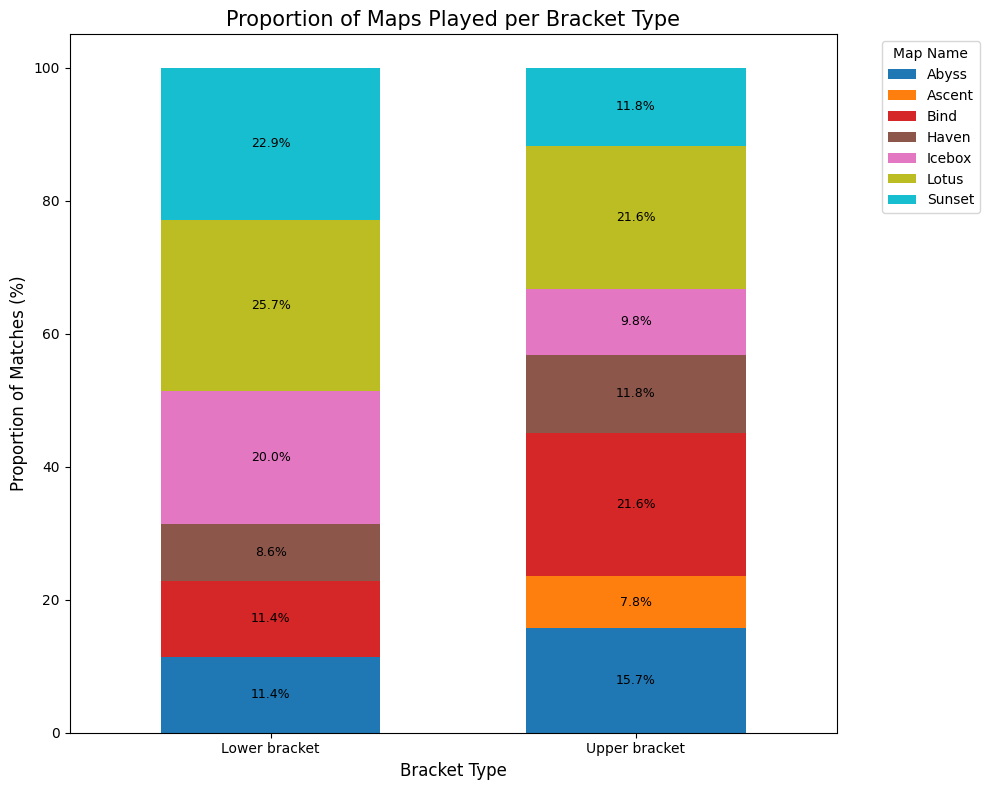

In [81]:
# Map distribution by Bracket Type
# 1. Create a crosstab: Bracket Type on X-axis, Maps as the stacks
# normalize='index' converts the counts into proportions (summing to 1.0)
bracket_map_proportions = pd.crosstab(map_summary_df['event_stage'], 
                                      map_summary_df['map_name'], 
                                      normalize='index') * 100

# 2. Plotting the stacked bar chart
# We use a distinct color palette (like 'tab10' or 'Set3') since there are many maps
ax = bracket_map_proportions.plot(kind='bar', 
                                  stacked=True, 
                                  figsize=(10, 8), 
                                  colormap='tab10', 
                                  width=0.6)

# 3. Add percentage labels inside each bar segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 3:  # Only show label if the segment is large enough to read
        ax.text(x + width/2, 
                y + height/2, 
                f'{height:.1f}%', 
                horizontalalignment='center', 
                verticalalignment='center',
                color='black',
                fontweight='normal',
                fontsize=9)

# 4. Formatting the chart
plt.title('Proportion of Maps Played per Bracket Type', fontsize=15, fontweight='normal')
plt.ylabel('Proportion of Matches (%)', fontsize=12)
plt.xlabel('Bracket Type', fontsize=12)
plt.xticks(rotation=0) # Keeps 'Upper bracket' and 'Lower bracket' horizontal
plt.legend(title='Map Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Perform Analysis on Performance data

In [82]:
performance_data

,Match ID,Map,Player,Team,Agent,2K,3K,4K,5K,1v1,1v2,1v3,1v4,1v5,ECON,PL,DE
0,378662,Haven,Lakia,GEN,Skye,4,0,0,0,0,0,0,0,0,53,5,0
1,378662,Haven,Munchkin,GEN,Viper,1,0,0,0,0,0,0,0,0,34,0,0
2,378662,Haven,t3xture,GEN,Jett,6,1,1,0,0,1,0,0,0,92,0,3
3,378662,Haven,Meteor,GEN,Killjoy,4,1,1,0,1,0,1,0,0,60,0,1
4,378662,Haven,Karon,GEN,Omen,2,1,0,0,0,0,0,0,0,47,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855,378829,Abyss,Boo,TH,Astra,2,0,0,0,0,0,1,0,0,31,0,0
856,378829,Abyss,RieNs,TH,Sova,1,1,0,0,0,0,0,0,0,51,1,0
857,378829,Abyss,MiniBoo,TH,Jett,3,0,0,0,0,0,0,0,0,36,0,1
858,378829,Abyss,Wo0t,TH,Gekko,3,0,0,0,0,1,0,0,0,55,5,0


### Top 10 Clutch Kings
- Compute total clutches (sum of 1v1–1v5 wins) per player  
- Aggregate and sort to get the top 10 clutch performers  
- Plot a bar chart showing total clutch wins for each player


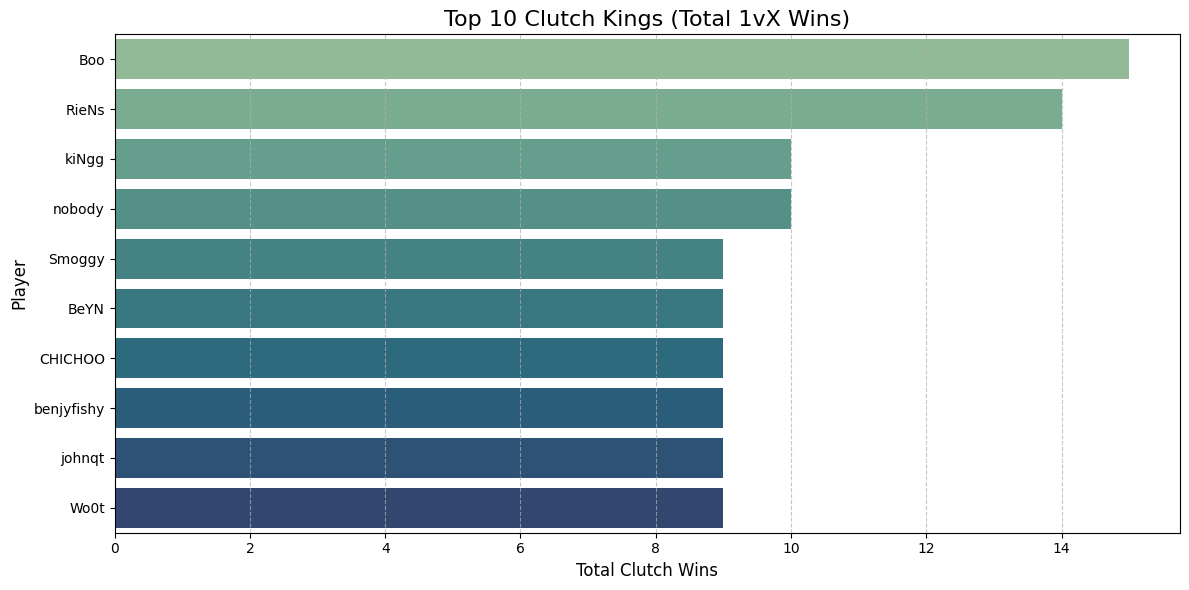

In [83]:
# Top 10 clutch kings
# Calculate total clutches
performance_data['Total_Clutches'] = performance_data['1v1'] + performance_data['1v2'] + performance_data['1v3'] + performance_data['1v4'] + performance_data['1v5']

# Aggregate by player
top_clutchers = performance_data.groupby('Player')['Total_Clutches'].sum().sort_values(ascending=False).head(10).reset_index()

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=top_clutchers, x='Total_Clutches', y='Player', palette='crest', hue = 'Player')
plt.title('Top 10 Clutch Kings (Total 1vX Wins)', fontsize=16)
plt.xlabel('Total Clutch Wins', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Spike Outcome by Map (Defusal vs Detonation %)
- Aggregate plants (PL) and defuses (DE) per map  
- Compute defuse % and detonated %  
- Sort maps by defuse % for cleaner ordering  
- Plot stacked bar chart showing defusal vs detonation


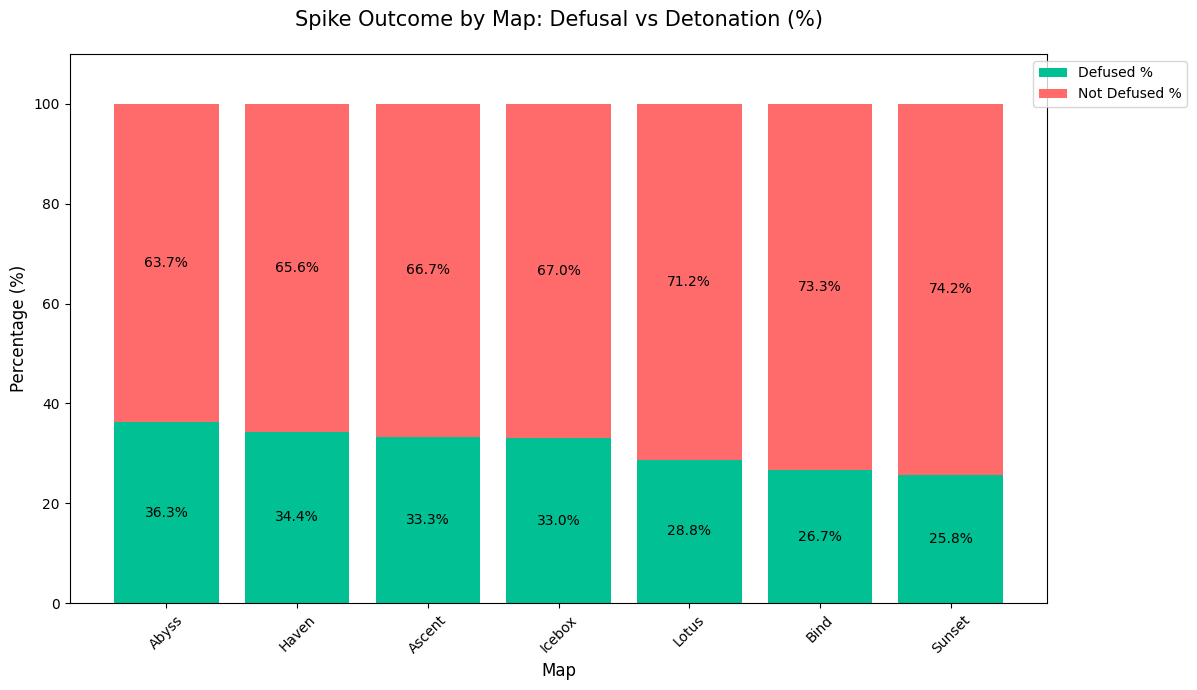

In [84]:
# Average spike plant vs difused by Map in percentage stacked bar

# Grouping data by Map and summing plants (PL) and defuses (DE)
map_stats = performance_data.groupby('Map').agg({'PL': 'sum', 'DE': 'sum'}).reset_index()

# Calculate the percentage of defuses relative to total plants
# Percentage Defused = (Total Defuses / Total Plants) * 100
map_stats['Defuse %'] = (map_stats['DE'] / map_stats['PL']) * 100

# Percentage Not Defused (Spike detonated or round ended)
map_stats['Detonated %'] = 100 - map_stats['Defuse %']

# Sorting by Defuse % for a cleaner look
map_stats = map_stats.sort_values(by='Defuse %', ascending=False)

# Plotting
plt.figure(figsize=(12, 7))

# Creating the stacked bars
plt.bar(map_stats['Map'], map_stats['Defuse %'], color='#00C094', label='Defused %')
plt.bar(map_stats['Map'], map_stats['Detonated %'], bottom=map_stats['Defuse %'], 
        color='#FF6B6B', label='Not Defused %')

# Formatting labels and title
plt.title('Spike Outcome by Map: Defusal vs Detonation (%)', fontsize=15, fontweight='normal', pad=20)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Map', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 110)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Adding the percentage text labels on the bars
for i, (idx, row) in enumerate(map_stats.iterrows()):
    # Label for Defuse %
    plt.text(i, row['Defuse %'] / 2, f"{row['Defuse %']:.1f}%", 
             ha='center', va='center', color='black')
    # Label for Detonated %
    plt.text(i, row['Defuse %'] + (row['Detonated %'] / 2), f"{row['Detonated %']:.1f}%", 
             ha='center', va='center', color='black')

plt.tight_layout()

### Average ECON Rating by Agent
- Group by agent to compute mean ECON rating  
- Sort results in descending order for clarity  
- Plot horizontal bar chart with distinct palette  


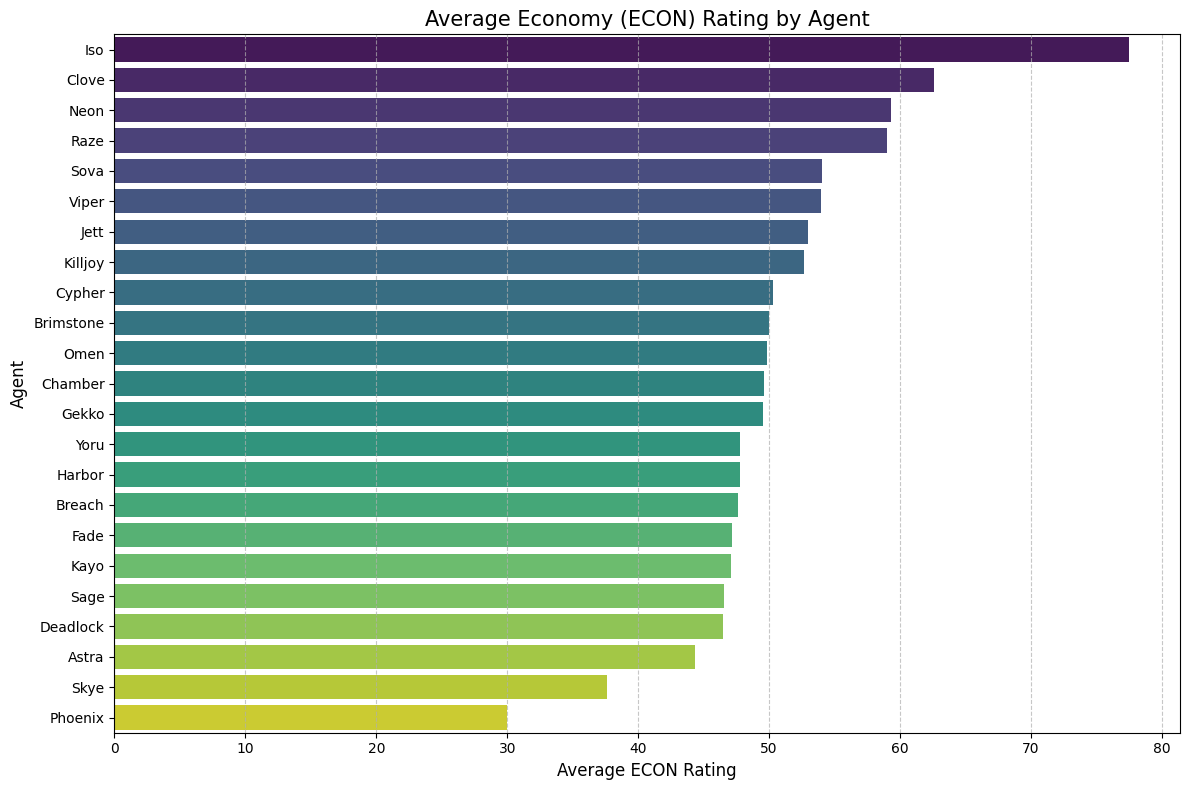

In [85]:
# Average Econ rating by Agent

# Calculate average ECON by Agent
agent_econ = performance_data.groupby('Agent')['ECON'].mean().sort_values(ascending=False).reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=agent_econ, x='ECON', y='Agent', palette='viridis', hue = 'Agent')

# Adding title and labels
plt.title('Average Economy (ECON) Rating by Agent', fontsize=15, fontweight='normal')
plt.xlabel('Average ECON Rating', fontsize=12)
plt.ylabel('Agent', fontsize=12)

# Adding grid for readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()

### Total Distribution of Multi‑Kills
- Sum multi‑kill columns (2K, 3K, 4K, 5K) across all matches  
- Plot bar chart showing total counts per kill type


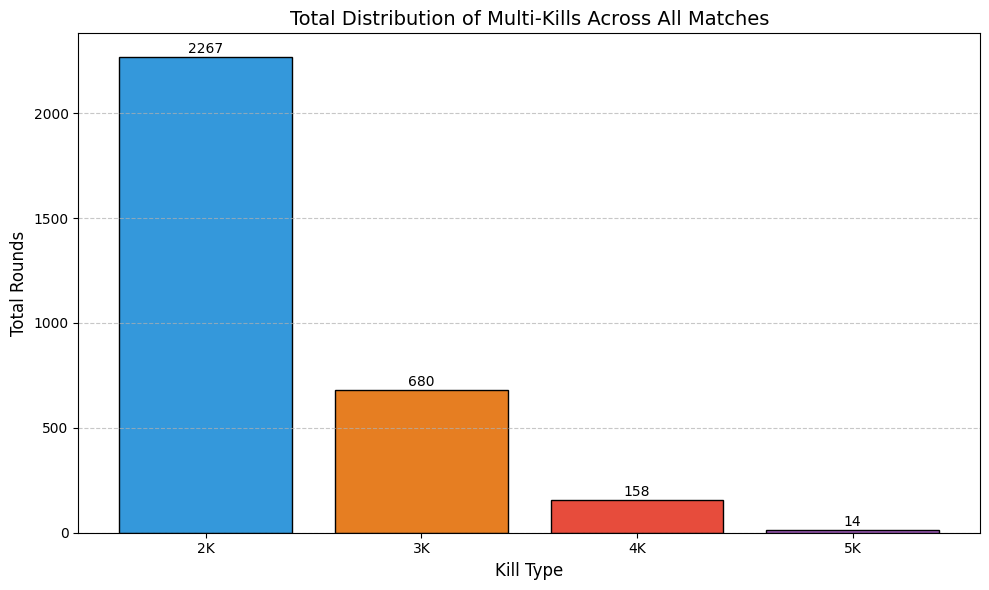

In [86]:
# Total distribution of multi kills across all matches 

# Sum the multi-kill columns
multikill_counts = performance_data[['2K', '3K', '4K', '5K']].sum()

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(multikill_counts.index, multikill_counts.values, color=['#3498db', '#e67e22', '#e74c3c', '#9b59b6'], edgecolor='black')

# Formatting
plt.title('Total Distribution of Multi-Kills Across All Matches', fontsize=14)
plt.xlabel('Kill Type', fontsize=12)
plt.ylabel('Total Rounds', fontsize=12)

# Adding value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

### Team Multi‑Kill Efficiency (3K, 4K, 5K)
- Aggregate high‑impact kills (3K, 4K, 5K) per team  
- Normalize by map count to compute efficiency rate  
- Calculate percentage distribution for stacked bar visualization  
- Sort teams by efficiency rate (top performers first)

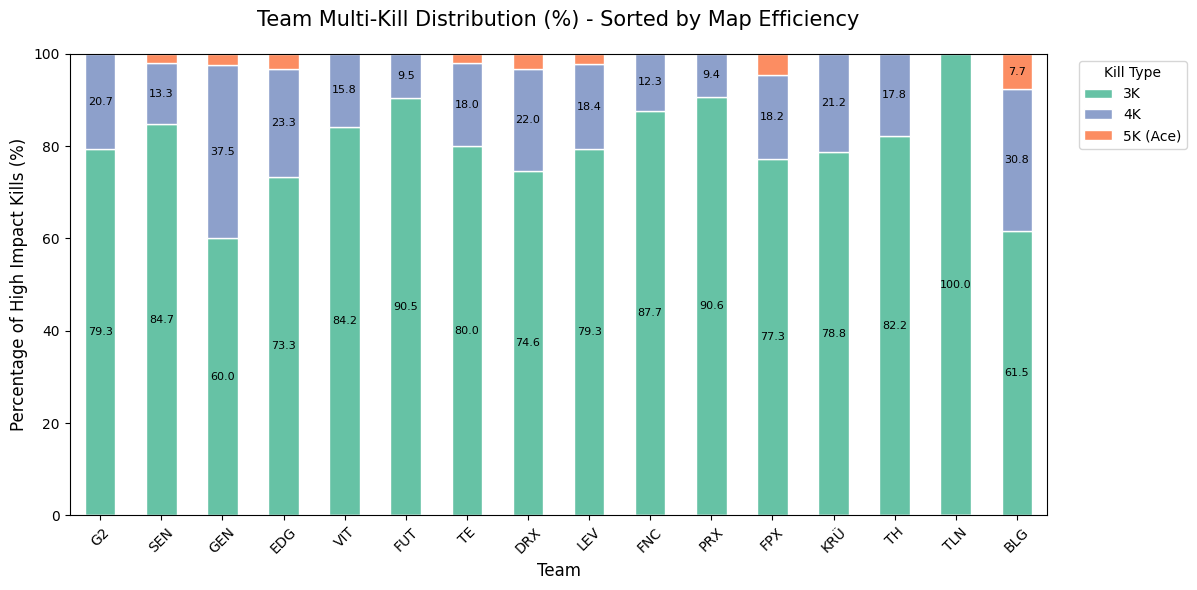

In [87]:
# Team multi kill Efficiency( 3K, 4K, 5K)

# 1. Aggregate High Impact Kills (3K, 4K, 5K) by Team
team_mk = performance_data.groupby('Team')[['3K', '4K', '5K']].sum()
team_mk['Total_HI'] = team_mk.sum(axis=1)

# 2. Calculate Map Counts per Team for sorting (Normalization)
team_map_counts = performance_data.groupby('Team').size() / 5
team_mk['Efficiency_Rate'] = team_mk['Total_HI'] / team_map_counts

# 3. Calculate Percentage Distribution (100% Stacked Bar)
team_perc = team_mk[['3K', '4K', '5K']].div(team_mk['Total_HI'], axis=0) * 100

# 4. Sort by Efficiency Rate (Top performing teams first)
team_perc['Efficiency_Rate'] = team_mk['Efficiency_Rate']
team_perc = team_perc.sort_values('Efficiency_Rate', ascending=False)
plot_data = team_perc.drop(columns=['Efficiency_Rate'])

# 5. Plotting
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#66c2a5', '#8da0cb', '#fc8d62']

plot_data.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='white')

# Formatting labels
ax.set_title('Team Multi-Kill Distribution (%) - Sorted by Map Efficiency', fontsize=15, fontweight='normal', pad=20)
ax.set_ylabel('Percentage of High Impact Kills (%)', fontsize=12)
ax.set_xlabel('Team', fontsize=12)
ax.legend(title='Kill Type', labels=['3K', '4K', '5K (Ace)'], loc='upper right', bbox_to_anchor=(1.15, 1))
ax.set_ylim(0, 100)

# Add percentage labels inside bars
for i, (idx, row) in enumerate(plot_data.iterrows()):
    cumulative = 0
    for col in plot_data.columns:
        val = row[col]
        if val > 5: # Only label visible segments
            ax.text(i, cumulative + (val / 2), f"{val:.1f}", 
                    ha='center', va='center', color='black', fontsize=8)
        cumulative += val

plt.xticks(rotation=45)
plt.tight_layout()

### Top 10 Players by Objective Plays (Plant + Defuse)
- Compute total objective plays (plants + defuses) per player  
- Aggregate and sort to get top 10 performers  
- Plot horizontal bar chart


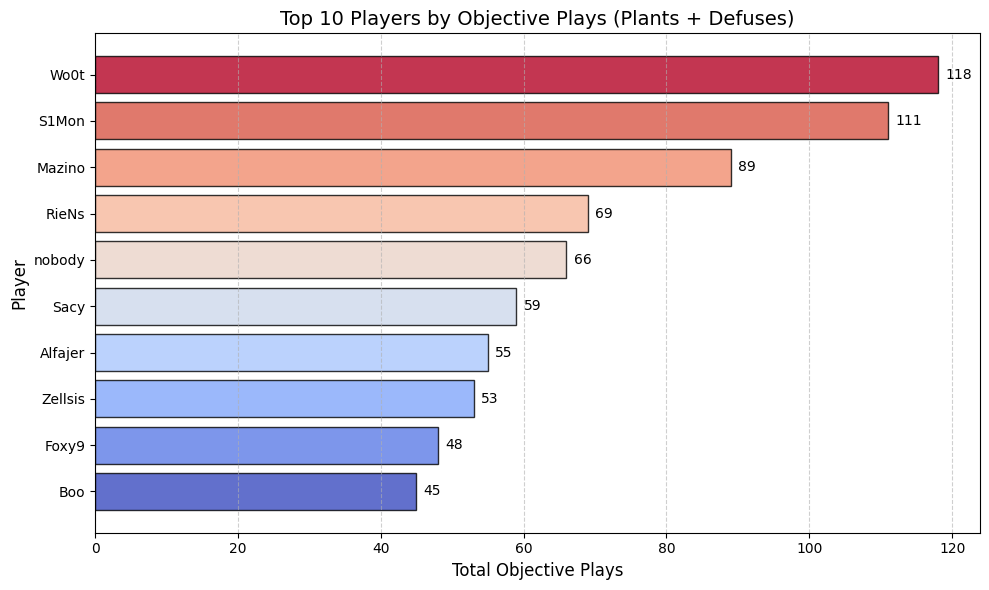

In [88]:
# Top 10 player by objective plays( Plant + Defuse)

# Calculate Total Objective Plays (Plant + Defuse)
performance_data['Objective_Plays'] = performance_data['PL'] + performance_data['DE']

# Group by Player and sum objective plays, then select the top 10
top_players_obj = performance_data.groupby('Player')['Objective_Plays'].sum().sort_values(ascending=False).head(10)

# Sort for plotting (lowest to highest to show the leader at the top of the chart)
top_players_plot = top_players_obj.sort_values(ascending=True)

# Visualization
plt.figure(figsize=(10, 6))

# Create color array using the 'coolwarm' colormap
colors = cm.coolwarm(np.linspace(0, 1, len(top_players_plot)))

# Plotting with fixed arguments
bars = plt.barh(top_players_plot.index, top_players_plot.values, color=colors, edgecolor='black', alpha=0.8)

plt.title('Top 10 Players by Objective Plays (Plants + Defuses)', fontsize=14, fontweight='normal')
plt.xlabel('Total Objective Plays', fontsize=12)
plt.ylabel('Player', fontsize=12)

# Add value labels at the end of each bar
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
             f'{int(bar.get_width())}', va='center', fontweight='normal')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

### Top 5 Players by Multi‑Kill Type
- Aggregate multi‑kills (2K, 3K, 4K, 5K) per player  
- For each category, select top 5 performers  
- Plot results in a 2×2 grid of horizontal bar charts

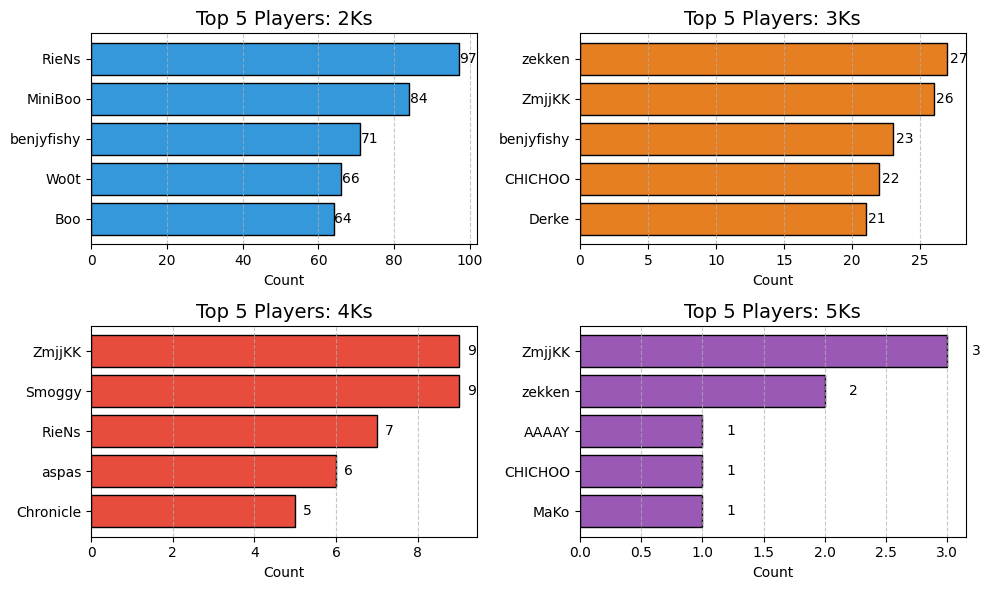

In [89]:
# Top 5 players for each multikill( 2K, 3K, 4K, 5K )

# Aggregating multikills by player
player_mk = performance_data.groupby('Player')[['2K', '3K', '4K', '5K']].sum()

categories = ['2K', '3K', '4K', '5K']
colors = ['#3498db', '#e67e22', '#e74c3c', '#9b59b6']

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes = axes.flatten()

for i, cat in enumerate(categories):
    # Get top 5 for the category
    top5 = player_mk[cat].sort_values(ascending=False).head(5)
    
    # Plotting
    bars = axes[i].barh(top5.index[::-1], top5.values[::-1], color=colors[i], edgecolor='black')
    axes[i].set_title(f'Top 5 Players: {cat}s', fontsize=14, fontweight='normal')
    axes[i].set_xlabel('Count')
    axes[i].grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add values to the end of bars
    for bar in bars:
        axes[i].text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, 
                     f'{int(bar.get_width())}', va='center', fontweight='normal')

plt.tight_layout()